#<font color='#1dcaff'>**Sentiment Analysis of #LongCovid tweets**</font>
<font color='#00aced'>Analyzing the sentiment of #LongCovid tweets to understand the emotional impact of long COVID on individuals. Identifying patterns and trends in positive, negative, or neutral sentiments expressed in these tweets.
#<font color='#1dcaff'><font size=5>**`Anastasija Cvetkovska 181006, Introduction to Data Science 2022/2023`**

#<font color='#1dcaff'>**Step 0. Read in Data and NLTK**</font>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [ ]:
# Read in data
data = pd.read_csv('/content/drive/MyDrive/lc2020.csv', encoding='ISO-8859-1')

# Data Preprocessing
data = data.dropna()
data = data[data.Date != 'Date']
data = data.drop_duplicates(subset='Tweets', keep='first', inplace=False)

df_main = data

# Read in data
data = pd.read_csv('/content/drive/MyDrive/lc2021.csv', encoding='ISO-8859-1')

# Data Preprocessing
data = data.dropna()
data = data[data.Date != 'Date']
data = data.drop_duplicates(subset='Tweets', keep='first', inplace=False)

# Merging
df_main = pd.concat([df_main, data])

# Read in data
data = pd.read_csv('/content/drive/MyDrive/lc2022.csv', encoding='ISO-8859-1')

# Data Preprocessing
data = data.dropna()
data = data[data.Date != 'Date']
data = data.drop_duplicates(subset='Tweets', keep='first', inplace=False)

# Merging Three Years
df_main = pd.concat([df_main, data])

tweets_df = df_main
print(tweets_df.sample(n = 5))

                              Date           User  \
785536   2022-06-17 18:33:12+00:00     danaparish   
1377125  2022-09-22 10:56:19+00:00    PPatrick007   
762664   2022-06-22 18:42:33+00:00  CryptoWarLive   
44424    2022-01-21 17:53:54+00:00     maryhalton   
428778   2021-08-06 16:42:54+00:00       Mar_Rin7   

                                                    Tweets  
785536   @Justchillout65 Yawn. That has nothing to do w...  
1377125  @dtrad @goodfoodgal This thing about long covi...  
762664   Women more likely to experience long COVID, re...  
44424    @AmyTanMD I have never seen DBH refer to Long ...  
428778   @chrislord @Dr_Ellie That gets fucked up. Hear...  


In [ ]:
# Sort the Dataframe
tweets_df = tweets_df.sort_values(by='Date')
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2191309 entries, 0 to 160128
Data columns (total 3 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Date    object
 1   User    object
 2   Tweets  object
dtypes: object(3)
memory usage: 66.9+ MB


In [ ]:
print(tweets_df.shape)

(2191309, 3)


##<font color='#1dcaff'>**Quick EDA**</font>

In [ ]:
tweets_df['Year'] = pd.DatetimeIndex(tweets_df.Date).year

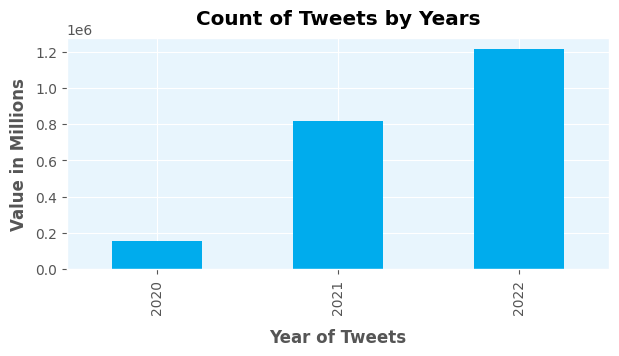

In [ ]:
ax = tweets_df['Year'].value_counts().sort_index() \
    .plot(kind='bar',
          figsize=(7, 3),
          color='#00aced')
plt.title('Count of Tweets by Years', fontweight='bold', pad = 10)
ax.set_xlabel('Year of Tweets', fontweight='bold', labelpad = 10)
ax.set_ylabel('Value in Millions', fontweight='bold', labelpad = 5)
ax.set_facecolor("#e8f5fd")
plt.show()

##<font color='#1dcaff'>**Text Cleaning**</font>

In [ ]:
import re

# A function to clean the tweets

def cleanTxt(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text) # Removed @mentions
  text = re.sub(r'#', '', text) #Removing the '#' symbol
  text = re.sub(r'RT[\s]+', '', text) # Removing RT
  text = re.sub(r'https?:\/\/\S+', '', text) # Remove the hyper link
  text = re.sub(r'', '', text) # Remove 
  text = re.sub(r'', '', text)
  text = re.sub(r'', '', text)
  text = re.sub(r'', '', text)
  text = re.sub(r'\n', '', text) # Remove \n
  text = re.sub(r'&amp;', '&', text) # Replace &
  text = re.sub(r'ð', '', text)
  text = re.sub(r'â', '\'', text) # Replace '

  return text

# Cleaning the text

tweets_df['Tweets']= tweets_df['Tweets'].apply(cleanTxt)

# Show the cleaned text

tweets_df

,Date,User,Tweets,Year
0,2020-04-01 00:23:31+00:00,Jennyjen_k,March was 367 days long. We are now finally em...,2020
1,2020-04-01 01:25:41+00:00,flowers197624,I never seen nothing made in China last so lon...,2020
2,2020-04-01 01:26:29+00:00,Rcarvz,I wonder how long Covid lives on car windows ...,2020
3,2020-04-01 01:38:13+00:00,NaniWaialeale,Many have wondered how long COVID-19 lasts on ...,2020
4,2020-04-01 02:43:35+00:00,graymaxwell1,Pre-existing issues caused my mother to take ...,2020
...,...,...,...,...
160132,2022-10-24 01:41:13+00:00,martianweye,Can't do anything i want or need or enjoy. Is ...,2022
160131,2022-10-24 01:41:25+00:00,JuliaRaifman,Even with chance of long COVID?,2022
160130,2022-10-24 01:41:26+00:00,NikkiMartell,_ADR Politics aside it's not that simple. Mo...,2022
160129,2022-10-24 01:41:27+00:00,GazelleInDminor,I am an annoyingly cheerful Pollyanna who has ...,2022


##<font color='#1dcaff'>**NLTK**</font>

In [ ]:
pd.set_option('display.max_colwidth', None)
example = tweets_df['Tweets'][928364]
print(example)

  I know. This is so frustrating.I was just checking in with my son's 16 year old friend's Mum about his condition. Healthy, fit, soccer player got Covid in Jan & now dealing with Cardiologists and Gastroenterologists at RCH. Missed more days of school than attended  LongCovid


In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['I',
 'know',
 '.',
 'This',
 'is',
 'so',
 'frustrating.I',
 'was',
 'just',
 'checking']

In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('I', 'PRP'),
 ('know', 'VBP'),
 ('.', '.'),
 ('This', 'DT'),
 ('is', 'VBZ'),
 ('so', 'RB'),
 ('frustrating.I', 'JJ'),
 ('was', 'VBD'),
 ('just', 'RB'),
 ('checking', 'VBG')]

In [ ]:
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [ ]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  I/PRP
  know/VBP
  ./.
  This/DT
  is/VBZ
  so/RB
  frustrating.I/JJ
  was/VBD
  just/RB
  checking/VBG
  in/IN
  with/IN
  my/PRP$
  son/NN
  's/POS
  16/CD
  year/NN
  old/JJ
  friend/NN
  's/POS
  Mum/NNP
  about/IN
  his/PRP$
  condition/NN
  ./.
  (PERSON Healthy/NNP)
  ,/,
  fit/NN
  ,/,
  soccer/NN
  player/NN
  got/VBD
  (PERSON Covid/NNP)
  in/IN
  (GPE Jan/NNP)
  &/CC
  now/RB
  dealing/VBG
  with/IN
  Cardiologists/NNS
  and/CC
  Gastroenterologists/NNS
  at/IN
  (ORGANIZATION RCH/NNP)
  ./.
  Missed/VBN
  more/JJR
  days/NNS
  of/IN
  school/NN
  than/IN
  attended/VBD
  (ORGANIZATION LongCovid/NNP))


#<font color='#1dcaff'>**Step 1. VADER Sentiment Scoring**</font>

<font color='#00aced'>I'll use NLTK's `SentimentIntensityAnalyzer` to get the `negative`, `neutral` and `positive` scores of the text.</font>

<font color='#00aced'><font size=4>‣</font>   It uses a "bag of words" approach:

1.   Stop words are removed
2.   Еach word is scored and combined to a total score





In [ ]:
from tqdm.notebook import tqdm
sia = SentimentIntensityAnalyzer()

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
sia

In [ ]:
sia.polarity_scores('This is so frustrating.')

{'neg': 0.555, 'neu': 0.445, 'pos': 0.0, 'compound': -0.5777}

In [ ]:
sia.polarity_scores('What a lovely flower!')

{'neg': 0.0, 'neu': 0.328, 'pos': 0.672, 'compound': 0.6239}

In [ ]:
sia.polarity_scores(example)

{'neg': 0.045, 'neu': 0.847, 'pos': 0.107, 'compound': 0.4588}

In [ ]:
tweets_df["Id"] = tweets_df.index + 1

In [ ]:
tweets_df = tweets_df[['Id','Date','User','Tweets','Year']]
tweets_df

,Id,Date,User,Tweets,Year
0,1,2020-04-01 00:23:31+00:00,Jennyjen_k,"March was 367 days long. We are now finally embarking on April which will be 3,670 days long. Covid_19",2020
1,2,2020-04-01 01:25:41+00:00,flowers197624,I never seen nothing made in China last so long Covid-19They definitely took their time with this one cause they had a plan????Then again are we sure it was made in China?Yet the world bought their test kits. I am sure they were cheap.,2020
2,3,2020-04-01 01:26:29+00:00,Rcarvz,I wonder how long Covid lives on car windows for?,2020
3,4,2020-04-01 01:38:13+00:00,NaniWaialeale,Many have wondered how long COVID-19 lasts on surfaces. Preliminary research shows that the coronavirus could live for up to:?? 3 hours in the air?? 4 hours on copper?? 24 hours on cardboard?? 3 days on plastic and stainless steel,2020
4,5,2020-04-01 02:43:35+00:00,graymaxwell1,"Pre-existing issues caused my mother to take turn for worse,needs round the clock care. Failure to act let the virus get out of control. Now choice is give up my job to care for her or send her to facility where I can??t visit for months. She won??t live that long. COVID-19",2020
...,...,...,...,...,...
160132,160133,2022-10-24 01:41:13+00:00,martianweye,Can't do anything i want or need or enjoy. Is this long covid? The consequences of my own internalised ableism? Retethering or an MCAS flare? None of these feel like good answers.,2022
160131,160132,2022-10-24 01:41:25+00:00,JuliaRaifman,Even with chance of long COVID?,2022
160130,160131,2022-10-24 01:41:26+00:00,NikkiMartell,_ADR Politics aside it's not that simple. Most people that had the original strain did not fare well. I have family members that were hospitalized and now have long Covid-19. Trump flubbed the whole thing. He suggested ingesting bleach? Then he wouldn't admit he was vaccinated.,2022
160129,160130,2022-10-24 01:41:27+00:00,GazelleInDminor,I am an annoyingly cheerful Pollyanna who has been living with Long COVID for more than two and a half years. I am also massively vaccinated against all manor of illness. And I am F*CKING terrified of this coming winter. Flu? COVID? I don't know. But it feels inevitable.,2022


In [ ]:
# Run the polarity score on the entire dataset

res = {}
for i, row in tqdm(tweets_df.iterrows(), total=len(tweets_df)):
    tweets = row['Tweets']
    id = row['Id']
    res[id] = sia.polarity_scores(tweets)

  0%|          | 0/2191309 [00:00<?, ?it/s]

In [ ]:
res

{1: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 2: {'neg': 0.122, 'neu': 0.557, 'pos': 0.321, 'compound': 0.5927},
 3: {'neg': 0.0, 'neu': 0.748, 'pos': 0.252, 'compound': 0.6597},
 4: {'neg': 0.179, 'neu': 0.821, 'pos': 0.0, 'compound': -0.5556},
 5: {'neg': 0.0, 'neu': 0.945, 'pos': 0.055, 'compound': 0.2732},
 6: {'neg': 0.375, 'neu': 0.625, 'pos': 0.0, 'compound': -0.6597},
 7: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 8: {'neg': 0.081, 'neu': 0.919, 'pos': 0.0, 'compound': -0.5719},
 9: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 10: {'neg': 0.189, 'neu': 0.684, 'pos': 0.127, 'compound': -0.1901},
 11: {'neg': 0.174, 'neu': 0.826, 'pos': 0.0, 'compound': -0.5859},
 12: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 13: {'neg': 0.255, 'neu': 0.745, 'pos': 0.0, 'compound': -0.9065},
 14: {'neg': 0.214, 'neu': 0.601, 'pos': 0.184, 'compound': -0.041},
 15: {'neg': 0.104, 'neu': 0.896, 'pos': 0.0, 'compound': -0.296},
 16: {'neg': 0.0, 'n

In [ ]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(tweets_df, how='left')

In [ ]:
# Now we have sentiment score and metadata

vaders

,Id,neg,neu,pos,compound,Date,User,Tweets,Year
0,1,0.000,1.000,0.000,0.0000,2020-04-01 00:23:31+00:00,Jennyjen_k,"March was 367 days long. We are now finally embarking on April which will be 3,670 days long. Covid_19",2020
1,1,0.000,1.000,0.000,0.0000,2021-06-29 23:59:21+00:00,Aineemac82,"_Utd Many won't agree to testing unless it was made compulsory & many will object to that. The risks of Covid & long covid to kids, teachers & school staff isn't acceptable. They could've been testing everyone long ago & isolating spread. Staff & kids now effected months later!",2021
2,1,0.000,1.000,0.000,0.0000,2022-01-31 23:59:18+00:00,RobocapFriend,My s-in-law had Covid 23months ago. She still has Long Covid. It has debilitated her.,2022
3,2,0.122,0.557,0.321,0.5927,2020-04-01 01:25:41+00:00,flowers197624,I never seen nothing made in China last so long Covid-19They definitely took their time with this one cause they had a plan????Then again are we sure it was made in China?Yet the world bought their test kits. I am sure they were cheap.,2020
4,2,0.122,0.557,0.321,0.5927,2021-06-29 23:58:59+00:00,SerpinaLonghaul,"Very useful guidelines for maintaining indoor air quality during wildfires, relevant to all but esp important for folks w/ asthma MCS longCOVID and other lung vulnerabilities.",2021
...,...,...,...,...,...,...,...,...,...
2191304,160896,0.193,0.620,0.187,-0.3472,2022-10-23 21:18:44+00:00,robinsoped101,Some of us not allowed to be angry and healthily resolve the source can in a sense lose our anger which is what helps us stay firm in our boundaries and enforce them. Exactly. Thank you. Why so important to have safe people and venues to stay in contact with and express anger.,2022
2191305,160635,0.043,0.844,0.113,0.5984,2022-10-23 22:18:29+00:00,feral__mom,"I've had long Covid for around 9 months now and I strength train, albeit not recently due to how fatigued I've been. I assume resting would be the most helpful thing for me to do based off what you said. Do you happen to have any sources for the information in this thread?",2022
2191306,160620,0.314,0.686,0.000,-0.7078,2022-10-23 22:22:39+00:00,SamiraNadkarni,"Fighting a migraine and it's not helping that coughing is really aggravating it, making me feel very nauseous. LongCovid",2022
2191307,160425,0.185,0.645,0.170,0.0202,2022-10-23 23:39:32+00:00,rareisnotsecret,"longcovid chronicillness Long covid needs to be taken seriously just like how jab adverse reactions should be taken seriously cause there are many like Alex who are crying out for help daily only for it to fall on deaf ears. ""No more silence please do not turn away.""",2022


##<font color='#1dcaff'>**Visualize VADER Results**</font>

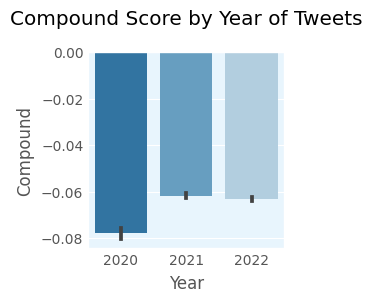

<Figure size 4000x1000 with 0 Axes>

In [ ]:
ax = sns.barplot(data = vaders, x = 'Year', y = 'compound')
ax.set_title('Compоund Score by Year of Tweets', pad = 20)
ax.set_xlabel('Year', labelpad = 5)
ax.set_ylabel('Compound', labelpad = 5)
plt.style.use('_mpl-gallery')
ax.set_facecolor('#e8f5fd')
plt.figure(figsize = (40, 10))
plt.show()

#<font color='#1dcaff'>**Step 2. RoBERTa Pretrained Model**</font>

<font color='#00aced'><font size=4>‣</font> Transformer model accounts for the words but also the context related to other words.

In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 62.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 57.6 MB/s eta 0:00:00


In [ ]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [ ]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [ ]:
# VADER results on example

print(example)
sia.polarity_scores(example)

  I know. This is so frustrating.I was just checking in with my son's 16 year old friend's Mum about his condition. Healthy, fit, soccer player got Covid in Jan & now dealing with Cardiologists and Gastroenterologists at RCH. Missed more days of school than attended  LongCovid


{'neg': 0.045, 'neu': 0.847, 'pos': 0.107, 'compound': 0.4588}

##<font color='#1dcaff'>**Run a RoBERTa Model**</font>

In [ ]:
tokenizer(example, return_tensors='pt')

{'input_ids': tensor([[    0,  1437,    38,   216,     4,   152,    16,    98, 10314,     4,
           100,    21,    95,  8405,    11,    19,   127,   979,    18,   545,
            76,   793,  1441,    18, 20675,    59,    39,  1881,     4, 21487,
             6,  2564,     6,  4191,   869,   300, 19150,   808,    11,  1133,
           359,   122,  4098,    19,  5866,   118, 10974,     8, 20691,  1001,
         11798, 10974,    23,   248,  3764,     4,  4523,   196,    55,   360,
             9,   334,    87,  2922,  1437,  2597,   347,  1417,   808,     2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [ ]:
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
output

SequenceClassifierOutput(loss=None, logits=tensor([[ 1.7519,  0.0570, -1.8254]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [ ]:
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores

array([0.82537174, 0.15155745, 0.02307075], dtype=float32)

In [ ]:
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.82537174, 'roberta_neu': 0.15155745, 'roberta_pos': 0.023070749}


In [ ]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [ ]:
tweets_df = tweets_df.sample(60000)
print(tweets_df.shape)

(60000, 5)


In [ ]:
res = {}
for i, row in tqdm(tweets_df.iterrows(), total=len(tweets_df)):
    try:
        tweets = row['Tweets']
        id = row['Id']
        vader_result = sia.polarity_scores(tweets)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(tweets)
        both = {**vader_result_rename, **roberta_result}
        res[id] = both
    except RuntimeError:
        print(f'Broke for id {id}')

  0%|          | 0/60000 [00:00<?, ?it/s]

In [ ]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(tweets_df, how='left')

In [ ]:
results_df.head()

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,Date,User,Tweets,Year
0,539916,0.168,0.832,0.000,-0.7845,0.787413,0.196370,0.016217,2022-04-17 01:10:13+00:00,Doboaso14,"_hali Here's an article with many links to those types of studies. Found by googling 'how common is long covid'. Also reminds that it's a vascular disease which attacks all organs, increasing risk for heart attacks, strokes and seizures. Even in 'mild' cases.",2022
1,499333,0.063,0.791,0.146,0.2960,0.780212,0.201797,0.017991,2021-07-19 05:00:40+00:00,JoTBizMD,"_rachel _nguyen I think 'so far' is the million dollar question. How long do we want to play Russian roulette with the virus mutating and potentially escaping vaccines and natural immunity altogether? Moreover, up to 30% of people infected with coronavirus end up with hideous 'long-COVID.'",2021
2,466017,0.192,0.808,0.000,-0.5859,0.930450,0.064484,0.005066,2022-03-05 13:32:40+00:00,dittmei,"Long Covid is a bitch and hits all ages. Some who ""recovered"" will need medical assistance for years.",2022
3,111378,0.215,0.731,0.054,-0.8176,0.552848,0.333632,0.113519,2021-04-20 01:10:46+00:00,Dakota_150,"Thank you & for highlighting the tragedy of Long Covid w/It's tragic that these elusive symptoms are striking down kids & young adults. We desperately need to continue to study these post-viral sequelae, they've been dismissed for far too long",2021
4,820302,0.000,1.000,0.000,0.0000,0.097036,0.652647,0.250317,2022-06-10 10:49:27+00:00,jabelincoln,Believe me. We're all quite aware of how long Covid has been already.,2022


##<font color='#1dcaff'>**Scores Comparison  Between the Models**</font>

In [ ]:
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'Date', 'User', 'Tweets',
       'Year'],
      dtype='object')

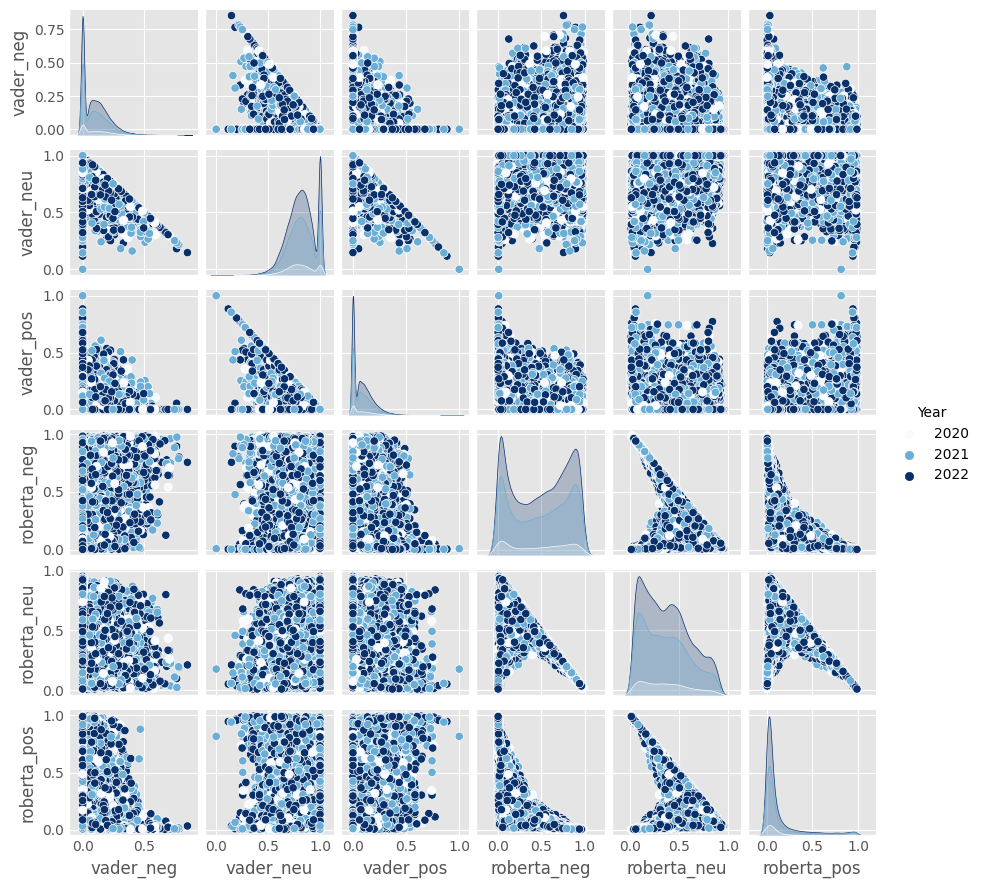

In [ ]:
sns.pairplot(data = results_df,
             vars = ['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue = 'Year',
            height = 1.5,
            palette='Blues')
plt.show()

#<font color='#1dcaff'>**In Addition: The Transformers Pipeline**</font>

<font color='#00aced'><font size=4>‣</font> Quick & easy way to run sentiment predictions.

In [ ]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'
Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


In [ ]:
pd.set_option('display.max_colwidth', None)
example1 = results_df['Tweets'][3562]
print(example1)

 Get ready for another surge. Maybe this variant won't hospitalize you. Or give you long Covid and tax the social security system even more.


In [ ]:
sent_pipeline(example1)

[{'label': 'NEGATIVE', 'score': 0.9964908957481384}]

In [ ]:
pd.set_option('display.max_colwidth', None)
example2 = results_df['Tweets'][9273]
print(example2)

2/BA.5 symptoms are generally more mild, as is the disease it causes.Why care, you may ask?Because:BA.5 can infect you even if you are triple or 4x-vaxxed.It can reinfect you repeatedly.And each COVID infection increases your chance of getting dangerous long COVID.


In [ ]:
sent_pipeline(example2)

[{'label': 'NEGATIVE', 'score': 0.9970620274543762}]

#<font color='#1dcaff'>**Observations**</font>


<font color='#00aced'><font size=4>‣ As expected, there is a very small amount of tweets about LongCovid that are positive and a big number of tweets that are very negative, which is very understandable regarding the Covid situation and the negative impact it had on so many lives.</font>



